In [2]:
import sys
#change to match where the PmagPy folder is on your computer
sys.path.insert(0, '/Users/Laurentia/PmagPy')
import pmag,pmagplotlib,ipmag # import PmagPy functions

import pmag
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

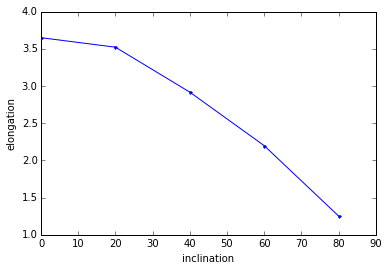

In [9]:
elongation_TK03_G30 = []
inclination_TK03_G30 = []

for inc in range(0,90,20):
    latitude = ipmag.lat_from_inc(inc)
    TK03_array = ipmag.tk03(n=10000,lat=latitude,G3=0.2)
    ppars = pmag.doprinc(TK03_array)
    elong = ppars['tau2']/ppars['tau3']
    elongation_TK03_G30.append(elong)
    inclination_TK03_G30.append(inc)
    
plt.plot(inclination_TK03_G30, elongation_TK03_G30,'.-')
plt.xlabel('inclination')
plt.ylabel('elongation')
plt.xlim(0,90)
plt.show()

`Laurentia$ tk03.py -n 100000 -lat 0 -G3 0.2`

Then saved results as `TK03_G30_commandline_lat0.txt`

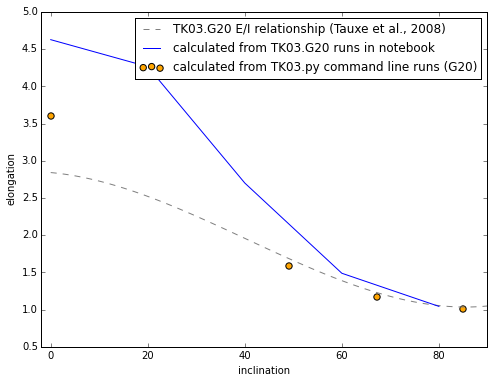

In [7]:
elongation_G20_commandline = []
inclination_G20_commandline = []

TK03_G20_lat0 = np.loadtxt('TK03_EI/TK03_G20_commandline_lat0.txt')
ppars = pmag.doprinc(TK03_G20_lat0)
elongation_G20_commandline.append(ppars['tau2']/ppars['tau3'])
inclination_G20_commandline.append(ipmag.inc_from_lat(0))

TK03_G20_lat30 = np.loadtxt('TK03_EI/TK03_G20_commandline_lat30.txt')
ppars = pmag.doprinc(TK03_G20_lat30)
elongation_G20_commandline.append(ppars['tau2']/ppars['tau3'])
inclination_G20_commandline.append(ipmag.inc_from_lat(30))

TK03_G20_lat50 = np.loadtxt('TK03_EI/TK03_G20_commandline_lat50.txt')
ppars = pmag.doprinc(TK03_G20_lat50)
elongation_G20_commandline.append(ppars['tau2']/ppars['tau3'])
inclination_G20_commandline.append(ipmag.inc_from_lat(50))

TK03_G20_lat80 = np.loadtxt('TK03_EI/TK03_G20_commandline_lat80.txt')
ppars = pmag.doprinc(TK03_G20_lat80)
elongation_G20_commandline.append(ppars['tau2']/ppars['tau3'])
inclination_G20_commandline.append(ipmag.inc_from_lat(80))

xa = np.linspace(0,90,num=90)
TK03_G20 = 2.842 + -5.961e-3*xa + -6.023e-4*xa**2 + 4.968e-6*xa**3

plt.figure(figsize=(8,6))
plt.plot(xa,TK03_G20,color='grey',linestyle='--',label='TK03.G20 E/I relationship (Tauxe et al., 2008)')
plt.plot(inclination_TK03_G20, elongation_TK03_G20,'b-',label='calculated from TK03.G20 runs in notebook')
plt.scatter(inclination_G20_commandline,elongation_G20_commandline,
            s=40,c='orange',label='calculated from TK03.py command line runs (G20)')
plt.xlabel('inclination')
plt.ylabel('elongation')
plt.xlim(-2,90)
plt.legend()
plt.show()